In [1]:
using Images
using BenchmarkTools
using TestImages

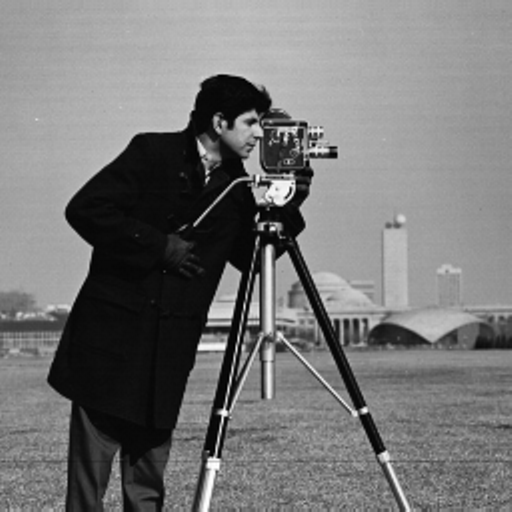

In [2]:
img = testimage("cameraman.tif")

In [3]:
#sum(img[1:Int(512/2),1:Int(512/2)])
#sum(img[Int(512/2):end,1:Int(512/2)])

In [4]:
sum(img[1:Int(512/2),1:Int(512/2)]).val

30740.81176470589

In [5]:
@allocated sum(img[1:Int(512/2),1:Int(512/2)]).val

65712

In [98]:
@allocated sum(view(img, 1:256, 1:256))

80

In [101]:
@benchmark sum(view(img, 1:256, 1:256)).val

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  75.791 μs … 286.375 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     75.958 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   76.954 μs ±   4.021 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █▅▂▁▁▁▁▁ ▂▁▃▁   ▁  ▂                                         ▁
  ███████████████████████▇▇▇▇▅▆▆▇▅▆▅▆▅▄▅▄▅▅▄▅▄▄▅▄▅▄▁▁▄▅▅▃▅▅▄▅▅ █
  75.8 μs       Histogram: log(frequency) by time      91.5 μs <

 Memory estimate: 128 bytes, allocs estimate: 5.

In [102]:
@benchmark sum(img[1:Int(512/2),1:Int(512/2)]).val

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  53.708 μs … 952.084 μs  ┊ GC (min … max): 0.00% … 89.39%
 Time  (median):     53.958 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   54.755 μs ±  21.061 μs  ┊ GC (mean ± σ):  0.90% ±  2.21%

  ▅█▇▇▅▃▃▁                ▁▁▁                                  ▂
  ████████▇▆▄▄▄▄▃▄▆▅▄▅▄▄▁▆████▇█▆▅▆▆▆▆▆▅▆▆▆▆▆▆▆▆▆▆▄▄▆▆▃▅▅▅▅▁▄▄ █
  53.7 μs       Histogram: log(frequency) by time      60.2 μs <

 Memory estimate: 64.17 KiB, allocs estimate: 6.

In [242]:
function get_values_quadrant(img, q_id)
    # img[1:Int(512/2),1:Int(512/2)]
    res = 0
    x, y = size(img)
    x_mid = Int(round(x/2))
    y_mid = Int(round(y/2))
    for i in 1:x_mid
        for j in 1:y_mid
           res += img[i,j]
        end
    end
    return res.val
end     

get_values_quadrant (generic function with 2 methods)

In [243]:
@benchmark get_values_quadrant(img, 1)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  60.917 μs … 664.250 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     61.167 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   61.931 μs ±   6.424 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▅█▆▂▁▁      ▂▂           ▁▁▁                                 ▁
  ███████████████████▇██▇▇█████▇█▆▇▅▅▅▄▅▆▅▄▅▄▄▄▅▄▄▃▄▃▄▄▃▄▃▃▅▄▃ █
  60.9 μs       Histogram: log(frequency) by time      70.5 μs <

 Memory estimate: 16 bytes, allocs estimate: 1.

In [236]:
get_values_quadrant(img, 1)

30740.811764709193

In [221]:
x, y = size(img)
x_mid = x ÷ 2 
y_mid = y ÷ 2 
sum(img[1:x_mid, 1:y_mid]).val

30740.81176470589

In [239]:
sum(img[1:256, 1:256]).val

30740.81176470589

In [ ]:
function get_values_quadrant(img, q_id)
    # img[1:Int(512/2),1:Int(512/2)]
    res = zero(Int64
    x, y = size(img)
    x_mid = x ÷ 2 
    y_mid = y ÷ 2 
    for i in 1:x_mid
        for j in 1:y_mid
           res += img[i,j]
        end
    end
    return res.val
end     

In [147]:
round(511/2)

256.0

In [138]:
sum(img[1:2,1:2]).val

2.454901960784314

In [115]:
@benchmark get_values_quadrant(img,1)

BenchmarkTools.Trial: 10000 samples with 326 evaluations.
 Range (min … max):  265.212 ns … 606.083 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     267.383 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   271.798 ns ±  13.861 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▆█▆▅▄▄▃▃▃▂▂▁▁▁                                                ▁
  ████████████████▇▇▇▇▆▇▆▆▆▆▅▅▅▆▅▅▄▄▅▅▃▅▅▅▅▅▅▅▅▆▅▅▆▄▆▅▅▆▅▅▅▄▅▄▅ █
  265 ns        Histogram: log(frequency) by time        338 ns <

 Memory estimate: 16 bytes, allocs estimate: 1.

In [119]:
get_values_quadrant(img,1)

129.13715f0

In [122]:
sum(img[1:Int(512/2), 1:Int(512/2)]).val

30740.81176470589

In [125]:
sum(img[1:Int(512/2), 1:Int(512/2)]).val

30740.81176470589

In [278]:
#sum(img[Int(512/2):end,1:Int(512/2)])

In [279]:
#?permuteddimsview

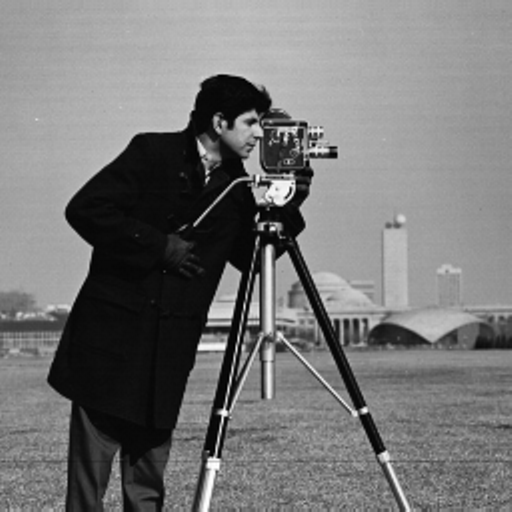

In [293]:
img = testimage("cameraman.tif")
#img2 = permuteddimsview(img, [2,1])

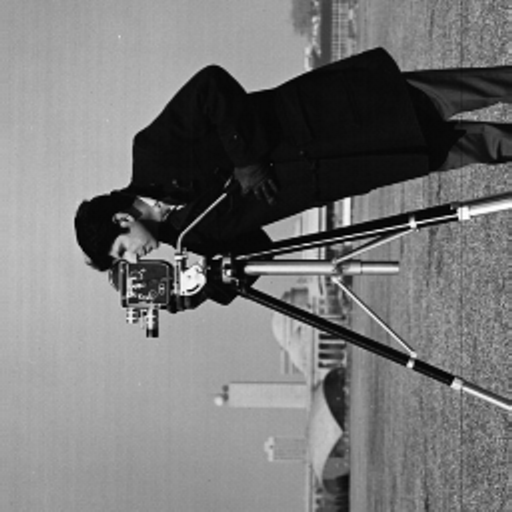

In [305]:
permuteddimsview(img, [2,1])

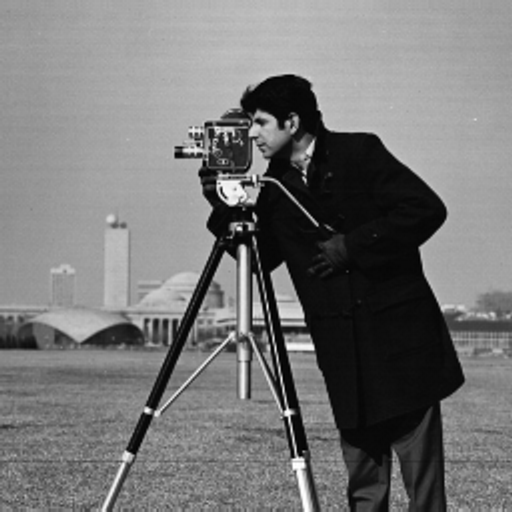

In [292]:
reverse(img,dims=2)

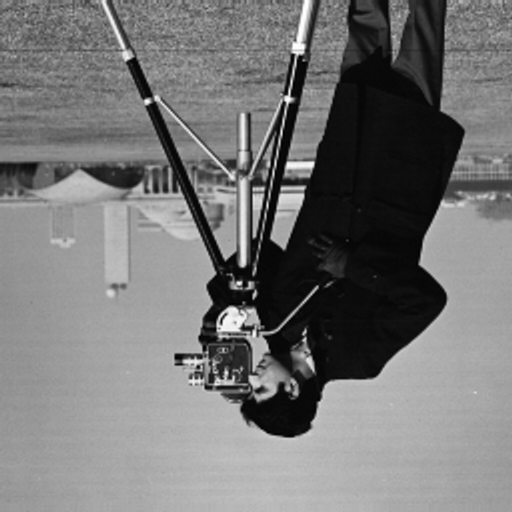

In [282]:
#show(img), show(reverse(img))
reverse(img)

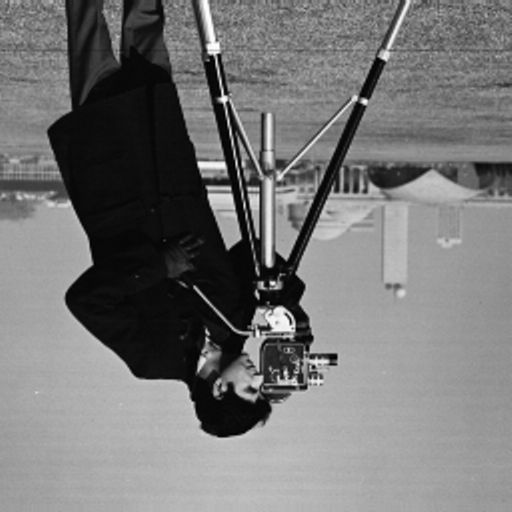

In [290]:
reverse(img;dims=1) 

,
,

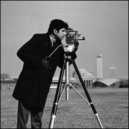
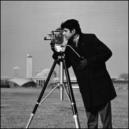
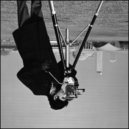
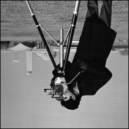

In [6]:
[[img, reverse(img;dims=1)] [reverse(img;dims=2), reverse(reverse(img;dims=2); dims=1)]]

,

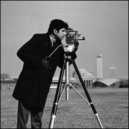
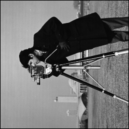

In [7]:
[img, permutedims(img,[2,1])]

,
,

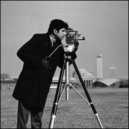
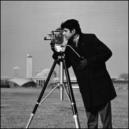
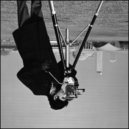
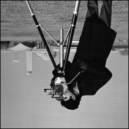

In [55]:
[[img, reverse(img;dims=1)] [reverse(img;dims=2), reverse(reverse(img;dims=2); dims=1)]]

In [78]:
function flip_horizontal(img)
    return @view img[end:-1:begin, 1:end]
end

function flip_vertical(img)
    return @view img[1:end, end : -1 : begin]
end

function flip_both(img)
    return @view img[end:-1:begin, end : -1 : begin]
end

flip_both (generic function with 1 method)

,
,

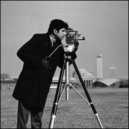
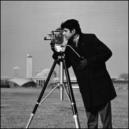
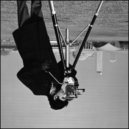
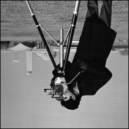

In [81]:
[[img, flip_horizontal(img)] [flip_vertical(img), flip_both(img)]]

In [82]:
@benchmark [[img, flip_horizontal(img)] [flip_vertical(img), flip_both(img)]]

BenchmarkTools.Trial: 10000 samples with 4 evaluations.
 Range (min … max):  7.708 μs …  1.246 ms  ┊ GC (min … max): 0.00% … 97.34%
 Time  (median):     7.969 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   8.174 μs ± 12.392 μs  ┊ GC (mean ± σ):  1.48% ±  0.97%

      ▂█▅▆▂                                                   
  ▂▂▃▆███████▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂ ▃
  7.71 μs        Histogram: frequency by time        9.75 μs <

 Memory estimate: 2.48 KiB, allocs estimate: 28.

In [83]:
@benchmark [[img, reverse(img;dims=1)] [reverse(img;dims=2), reverse(reverse(img;dims=2); dims=1)]]

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  337.709 μs …  1.026 ms  ┊ GC (min … max): 0.00% … 44.98%
 Time  (median):     342.625 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   351.115 μs ± 53.129 μs  ┊ GC (mean ± σ):  1.27% ±  5.36%

  █▇▄▂▁ ▁                                                      ▂
  ████████▇▆▇▇▆▆▃▄▃▄▅▄▅▄▃▃▄▅▃▄▃▄▃▄▄▁▃▁▁▃▅▆▅▇▅▄▃▄▁▁▁▃▁▁▁▁▁▃▄▄▁▃ █
  338 μs        Histogram: log(frequency) by time       642 μs <

 Memory estimate: 1.00 MiB, allocs estimate: 11.